In [1]:
import numpy as np

In [2]:
fileName = "testSet.txt"
delim = '\t'
fr = open(fileName)
stringArr = [line.strip().split(delim) for line in fr.readlines()]
datArr = [list(map(float, line)) for line in stringArr]
dataMat = np.mat(datArr)
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [14]:
topNfeat = 1
meanVals = np.mean(dataMat, axis=0)
print("平均值:", meanVals)
# 每列减去平均值
meanRemoved = dataMat - meanVals
# meanRemoved.shape # (1000, 2)

# np.cov() 求协方差矩阵
covMat = np.cov(meanRemoved, rowvar=0)
# covMat
"""
array([[1.05198368, 1.1246314 ],
       [1.1246314 , 2.21166499]])
"""

# np.linalg.eig()求方阵的特征值和特征向量
eigVals, eigVects = np.linalg.eig(np.mat(covMat))
eigValInd = np.argsort(eigVals)
eigValInd = eigValInd[:-(topNfeat + 1):-1]
# 前N大特征值对应的特征向量
redEigVects = eigVects[:, eigValInd]
print(redEigVects.shape) # (2, 1)

# 得到降维后的数据
lowDDataMat = meanRemoved * redEigVects
lowDDataMat[:10]

平均值: [[9.06393644 9.09600218]]
(2, 1)


matrix([[-2.51033597],
        [-2.86915379],
        [ 0.09741085],
        [-0.76778222],
        [ 1.02715333],
        [-1.44409178],
        [-2.17360352],
        [-0.7739988 ],
        [-1.09983463],
        [-1.70275987]])

In [4]:
# 
reconMat = (lowDDataMat * redEigVects.T) + meanVals
reconMat[:10]

matrix([[10.37044569, 11.23955536],
        [10.55719313, 11.54594665],
        [ 9.01323877,  9.01282393],
        [ 9.46353019,  9.75160448],
        [ 8.52935248,  8.21892524],
        [ 9.81551682, 10.32909909],
        [10.19519263, 10.95202257],
        [ 9.46676563,  9.75691276],
        [ 9.63634752, 10.03514103],
        [ 9.95014113, 10.54997343]])

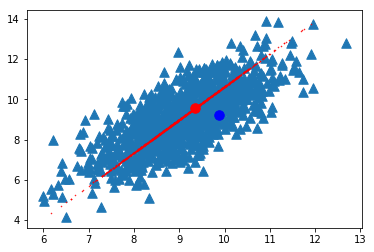

In [13]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='.', s=1, c='red')

ax.scatter(dataMat[:,0].flatten().A[0][10], dataMat[:,1].flatten().A[0][10], marker='o', s=90, c='blue')
ax.scatter(reconMat[:,0].flatten().A[0][10], reconMat[:,1].flatten().A[0][10], marker='o', s=90, c='red')
plt.show()

In [22]:
a = np.array([1, 2])
m = np.mat(a)
print(type(m), m)

<class 'numpy.matrix'> [[1 2]]


In [17]:
a = np.array([[1, 2]])
m = np.mat(a)
m

matrix([[1, 2]])

In [21]:
a1 = m.A
print(type(a1), a1)

a2 = np.array(m)
print(type(a2), a2)

<class 'numpy.ndarray'> [[1 2]]
<class 'numpy.ndarray'> [[1 2]]


In [20]:
np.array(m)

array([[1, 2]])